## EE 242 Lab 2 – Convolution

Author names go here, please include every group member's first and last name. 

In [1]:
# We'll refer to this as the "import cell." Every module you import should be imported here.

#numpy allows numerical math computation
import numpy as np

#matplotlib is for graphical plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

#simpleaudio and wav required for importing, playing, and manipulating .wav files 
import simpleaudio as sa
from scipy.io import wavfile as wav

#needed for already provided timescale function
import scipy.signal as sig

#If you are using google colab:
#simpleaudio is unable to emit sound from google colab, so IPython is easy workaround to allow us to hear audio playback, demonstration later. 
import IPython

#skimage is for image processing
import skimage
from skimage import color


In [2]:
#if you need to install anything:
!pip install numpy
!pip install matplotlib
!pip install IPython
!pip install scikit-image
!pip install simpleaudio

In [3]:
#if using google colab, run this cell and select from dropdown menu relevant lab files to upload
#from google.colab import files
#uploaded = files.upload()

In [4]:
#If using google colab, this is a valid way to play sound. Also works on your local machine/anaconda/visual studio code. 
IPython.display.Audio('trombone11.wav')

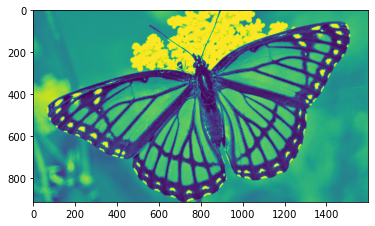

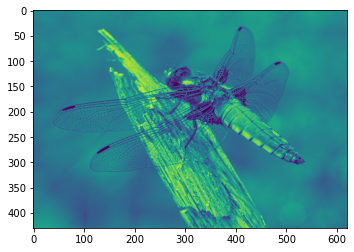

In [5]:
#To read in and view images: 
#load the image and convert to grayscale
dragonfly=color.rgb2gray(plt.imread('dragonfly.jpg'))
butterfly=color.rgb2gray(plt.imread('butterfly.jpg'))
plt.imshow(butterfly)
plt.figure()
plt.imshow(dragonfly)
#don't worry about weird tint: scientific image processing is about clearly recognizing geometry/shape 

## Summary

In this lab, you will work through a series of exercises involving convolution of time signals and images.  This is a two-week lab.  You should plan on completing the first 3 assignments in the first week.

## Lab 2 turn in checklist

•	Pre-lab (upload to canvas before lab)

•	Lab 1 Jupyter notebook with code for the first 4 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

•	1 individual Jupyter notebook with code + markdown cells for the last exercise

Note: The pre-lab should be done individually, and all other assignments should be completed in groups of 3-4 people.


## Assignment 1 -- Simple Convolutions

Text(0, 0.5, 'y2[n]')

<Figure size 360x360 with 0 Axes>

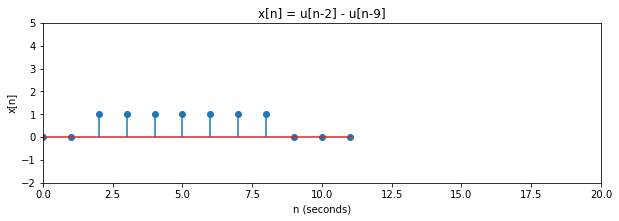

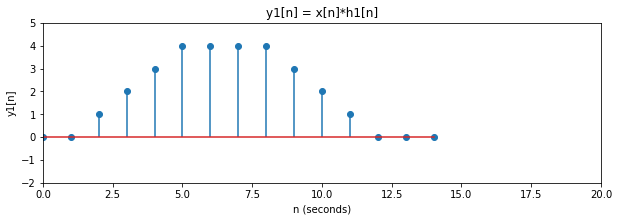

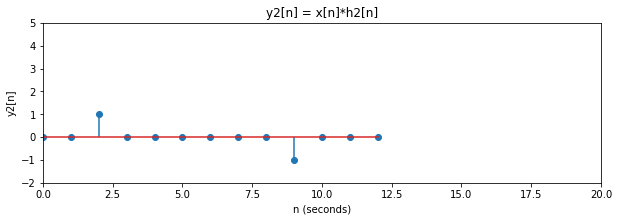

In [7]:
# Assignment 1 - Time Scaling Function

# Part A

# Create three discrete-time signals, assuming a time range of [0,12]
# x: input signal vector, a box of height 1 starting at time n=2 and ending at n=8
# h1: a pulse of length 4 & height 1 starting at time 0
# h2 = 1 at n=0, -1 at n=1, and 0 otherwise
# TODO: Code that solves B

range_t = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] #manualing inputing values for time range of [0, 12]
x = [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0] #
h1 = [1, 1, 1, 1]
h2 = [1, -1]

# Part B
# Find the responses y1=x*h1 and y2=x*h2
# TODO: Code that solves B
y1 = np.convolve(x, h1) #convolves x and h1
y2 = np.convolve(x, h2) #convolves x and h2

# Part C
# Plot x, y1 and y2 in a 3x1 plot
# TODO: Code that solves C

fig = plt.figure(1, figsize=(5, 5))

nx = np.arange(len(x)) #creates evenly-spaced values for x
ny1 = np.arange(len(y1)) #creates evenly-spaced values for y1
ny2 = np.arange(len(y2)) #creates evenly-spaced values for y2

plt.figure(figsize = (10, 10))
plt.subplot(311)
plt.stem(nx, x)
plt.xlim(0,20)
plt.ylim(-2,5)
plt.title('x[n] = u[n-2] - u[n-9]')
plt.xlabel('n (seconds)')
plt.ylabel('x[n]')

plt.figure(figsize = (10, 10))
plt.subplot(312)
plt.stem(ny1, y1)
plt.xlim(0,20)
plt.ylim(-2,5)
plt.title('y1[n] = x[n]*h1[n]')
plt.xlabel('n (seconds)')
plt.ylabel('y1[n]')

plt.figure(figsize = (10, 10))
plt.subplot(313)
plt.stem(ny2, y2)
plt.xlim(0,20)
plt.ylim(-2,5)
plt.title('y2[n] = x[n]*h2[n]')
plt.xlabel('n (seconds)')
plt.ylabel('y2[n]')


x= [1 2] y= [3 4 5] z= [1 2 3 4 5]


<StemContainer object of 3 artists>

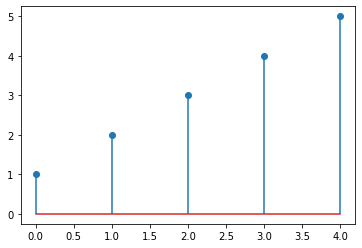

In [8]:
#Assignment 1 hints/useful functions to consider:
x=np.array([1,2])
y=np.array([3,4,5])
z=np.concatenate((x,y))
print('x=',x,'y=',y,'z=',z)
plt.stem(z)

###  Discussion

Comment on what aspects of the input signal correspond to the largest values of y1[n] and y2[n] 

## Assignment 2 -- Smoothing Signals

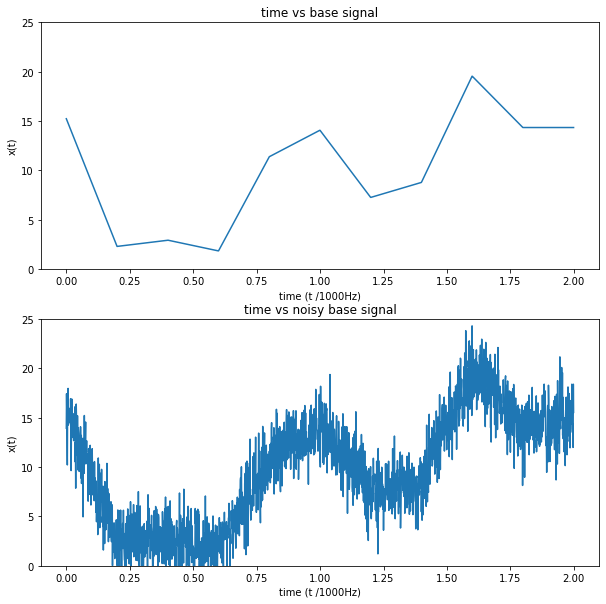

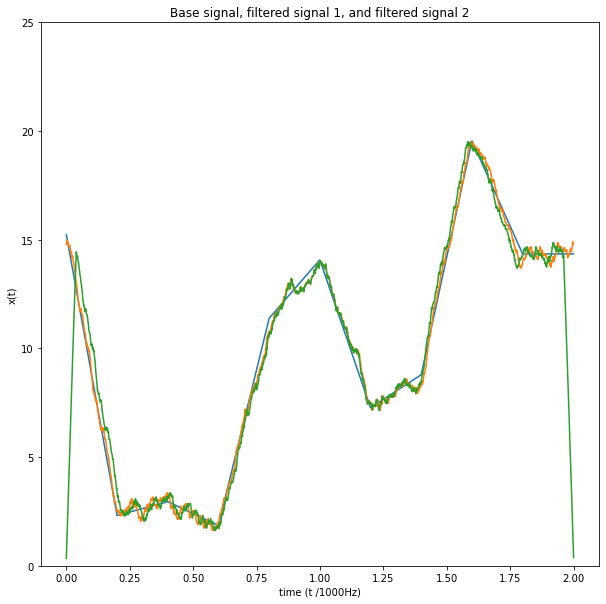

In [12]:
# Assignment 2 - Amplitude Operations on Signals

# Part A
# set up relevant parameters
srate = 1000 # sampling rate in Hz
time  = np.arange(0,2,1/srate) # associated time vector that corresponds to 2 seconds
n     = len(time) # length of the time vector

# here is a base signal to work with, values of signal points chosen randomly
p     = 10 # points for piecewise linear signal
amp = 20   # amplitude range of base signal
base = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*amp)

# create some random noise to be added to the above base signals
noiseamp = 2
noise  = noiseamp * np.random.randn(n)

# add noise to the base signals to create new noisy signals
# TODO: Code that solves the rest of A
noisy_signal = np.add(noise, base) #adds the noise and base signals together to create the new noisy signal

fig = plt.figure(1, figsize=(10, 10))

plt.subplot(211)
plt.ylim(0, 25)
plt.plot(time, base)
plt.title('time vs base signal')
plt.xlabel('time (t /1000Hz)')
plt.ylabel('x(t)')

plt.subplot(212)
plt.ylim(0,25)
plt.plot(time, noisy_signal)
plt.title('time vs noisy base signal')
plt.xlabel('time (t /1000Hz)')
plt.ylabel('x(t)')

# Part B
# implement the running mean filter with a for loop
# TODO: Code that solves B

i = 0 #reference value for for-loop
k = 20 #k-number of samples
filtsig1 = [] #empty array to append values after noisy signal values have been filtered

for n in range(len(time)):
    if i < k: #argument for taking the average of values within the range from index 0 of the noisy signal to the current index plus 20 
        x = np.mean(noisy_signal[0: i+k+1])
    elif i + k > len(time): #argument for taking the average of values within the range of minus 20 from the current index the noisy signal to the last index of the noisy signal
        x = np.mean(noisy_signal[i-k: len(time) + 1])
    else: #argument for taking the average of values within the range of minus 20 from the current index to plus 20 from the current index
        x = np.mean(noisy_signal[i-k: i+k+1])
        
    filtsig1.append(x) #adds the average value x into the filtered signal list
    i += 1
    
filtsig1 = np.array(filtsig1) #converts filtered signal list to numpy array

fig = plt.figure(2, figsize=(10, 10))
plt.ylim(0, 25)
plt.plot(time, base)
plt.plot(time, filtsig1)
plt.title('Base signal, filtered signal 1, and filtered signal 2')
plt.xlabel('time (t /1000Hz)')
plt.ylabel('x(t)')

# Part C
# implement smoothing using convolution
# TODO: Code that solves C

n = (2 * k) + 1 #length of box
height = 1/n #height of box
hfilt = np.ones(n) * height #creates a vector with dimensions n and height

filtsig2 = np.convolve(noisy_signal, hfilt) #convolves the noisy signal with hfilt to create the filtered signal 2

time = np.linspace(0, 2, len(filtsig2))
plt.plot(time, filtsig2)

In [10]:
#Assignment 2 hint: using a for loop, consider a "sliding window" as follows: 
x=np.arange(10)
print('x = ',x)
for k in range(0,5):
  print('k=',k,', window =', x[k:k+3])
print('etc...')

x =  [0 1 2 3 4 5 6 7 8 9]
k= 0 , window = [0 1 2]
k= 1 , window = [1 2 3]
k= 2 , window = [2 3 4]
k= 3 , window = [3 4 5]
k= 4 , window = [4 5 6]
etc...


###  Discussion

Describe the differences in the results using the two methods and explain these differences in terms of system properties. Comment on how the results and plots change when you amplify the noise more and also change the value of k. 

## Assignment 3 -- Removing Noise from an Audio Signal 

In [11]:
# Assignment 3 -- Title of assignment 3

# Part A
# TODO: Code that solves A

scaling_factor = 100
fs1, x1 = wav.read('trombone11.wav') #reads in the trombone sound
tr_orig = np.array(x1)
noise  = scaling_factor * np.random.randn(len(tr_orig)) #creates random noise relevant to the contents of the trombone sound

tr_noisy = np.add(tr_orig, noise) #adds together the random noise and trombone sound array to create a noisy trombone
outfiletr_noisy = 'tr_noisy.wav' #saves the noisy trombone to an new wav file
wav.write(outfiletr_noisy, fs1, tr_noisy.astype('int16'))


# Part B
# TODO: Code that solves B

tr_filt = np.convolve(tr_orig, tr_noisy) #convolves the orignal trombone sound and the noisy trombone sound
outfiletr_filt = 'tr_filt.wav' #saves the filtered trombone sound to a new wav file
wav.write(outfiletr_filt, fs1, tr_filt.astype('int16'))

# Part C
# TODO: Code that solves C
         

11145 -7957


###  Discussion

Comment on the differences in how the original and noise-removed signals sound. Comment on the impact of large increases or decreases in the value of k. 

## Assignment 4 -- Convolution with Images

In [43]:
#Sobel edge detectors provided here for your convenience:
h1=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
h2=h1.T
print('h1 = ')
print(h1)
print('h2 =')
print(h2)

h1 = 
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
h2 =
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [ ]:
# Part A
# TODO: Code that solves A

# Part B
# TODO: Code that solves B

# Part C
# TODO: Code that solves C

# Part D
# TODO: Code that solves D

#interesting aside: notice Sobel edge detection is basically just discrete gradient magnitude 

### Discussion

Describe the differences in the results using the edge detector or the original and smoothed image. Comment on how the results change if you use a larger size smoothing filter.